In [1]:
import matplotlib.pyplot as plt  
import numpy as np  
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, silhouette_score

In [2]:
iris = load_iris()


In [3]:
iris_df = pd.DataFrame(iris.data, columns= iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


We plot the six different scatter plots 

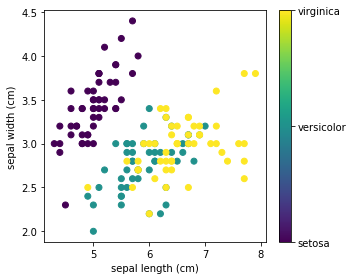

In [4]:
x_index = 0
y_index = 1

formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.figure(figsize=(5,4))
plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target)
plt.colorbar(ticks=[0,1,2], format=formatter)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])

plt.tight_layout()
plt.show()

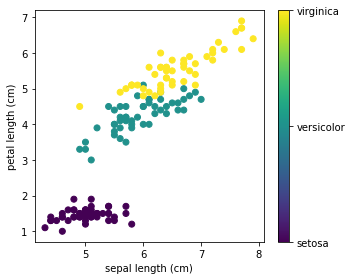

In [5]:
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.figure(figsize=(5,4))
plt.scatter(iris.data[:, x_index], iris.data[:, y_index+1], c=iris.target)
plt.colorbar(ticks=[0,1,2], format=formatter)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index+1])

plt.tight_layout()
plt.show()

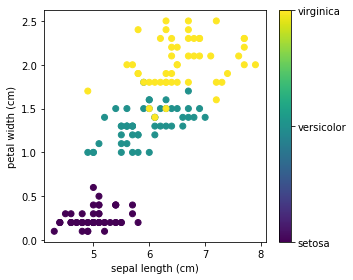

In [6]:
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.figure(figsize=(5,4))
plt.scatter(iris.data[:, x_index], iris.data[:, y_index+2], c=iris.target)
plt.colorbar(ticks=[0,1,2], format=formatter)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index+2])

plt.tight_layout()
plt.show()

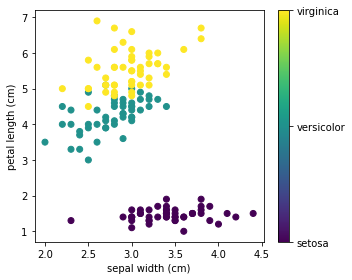

In [7]:
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.figure(figsize=(5,4))
plt.scatter(iris.data[:, x_index+1], iris.data[:, y_index+1], c=iris.target)
plt.colorbar(ticks=[0,1,2], format=formatter)
plt.xlabel(iris.feature_names[x_index+1])
plt.ylabel(iris.feature_names[y_index+1])

plt.tight_layout()
plt.show()

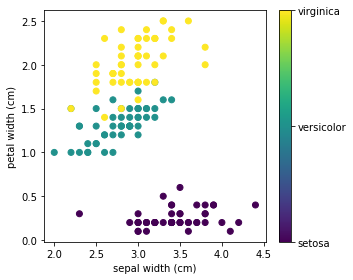

In [8]:
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.figure(figsize=(5,4))
plt.scatter(iris.data[:, x_index+1], iris.data[:, y_index+2], c=iris.target)
plt.colorbar(ticks=[0,1,2], format=formatter)
plt.xlabel(iris.feature_names[x_index+1])
plt.ylabel(iris.feature_names[y_index+2])

plt.tight_layout()
plt.show()

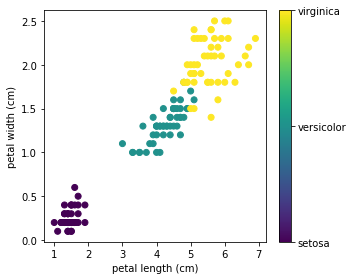

In [9]:
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.figure(figsize=(5,4))
plt.scatter(iris.data[:, x_index+2], iris.data[:, y_index+2], c=iris.target)
plt.colorbar(ticks=[0,1,2], format=formatter)
plt.xlabel(iris.feature_names[x_index+2])
plt.ylabel(iris.feature_names[y_index+2])

plt.tight_layout()
plt.show()

From the above 6 scatter plots it is evident that the scatter plot of:

    1) Petal width (cm) vs petal length (cm)
    2) Petal width (cm) vs sepal width (cm)

are the ones that are promising from the 6

In [10]:
x = iris_df.iloc[:, 0:3].values

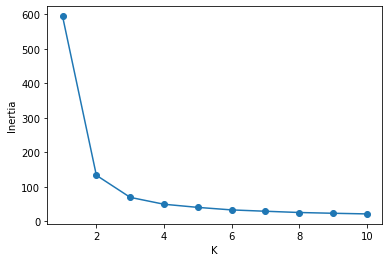

In [11]:
def eval_Kmeans(x, k, r):
    kmeans = KMeans(n_clusters=k, random_state=r)
    kmeans.fit(x)    
    return kmeans.inertia_

def elbow_Kmeans(x, max_k=10, r=123):
    within_cluster_vars = [eval_Kmeans(x, k, r) for k in range(1,max_k+1)]
    plt.plot(range(1,11), within_cluster_vars,marker='o')
    plt.xlabel('K')
    plt.ylabel('Inertia')
    plt.show()

elbow_Kmeans(x)


we start with Petal width vs petal length.

we do our kmeans and plot

In [12]:
X_1 = iris_df[['petal width (cm)','petal length (cm)']].values.reshape(-1,2)

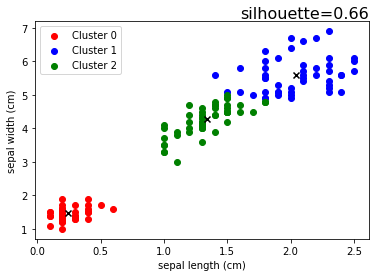

In [13]:
def scatter_Kmeans(x, k, r=123):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=r)
    y_pred = kmeans.fit_predict(x)
    colours = 'rbgcmy'
    for c in range(k):
      plt.scatter(x[y_pred == c, 0], x[y_pred == c,1], c = colours[c], label = 'Cluster {}'.format(c))
      plt.scatter(kmeans.cluster_centers_[c, 0], kmeans.cluster_centers_[c, 1], marker='x', c = 'black')
    
    score = round(silhouette_score(X_1, kmeans.labels_, metric='euclidean'),2)
    plt.title('silhouette={}'.format(score), loc='right', fontdict={'fontsize': 16}, pad=-14)
    plt.xlabel(iris.feature_names[x_index])
    plt.ylabel(iris.feature_names[y_index])
    plt.legend()
    plt.show()
    
scatter_Kmeans(X_1, 3, r=0)

In [14]:
X_2 = iris_df[['petal width (cm)','sepal width (cm)']].values.reshape(-1,2)

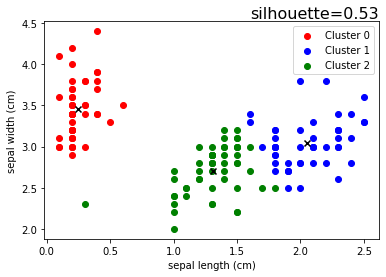

In [15]:
def scatter_Kmeans(x, k, r=123):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=r)
    y_pred = kmeans.fit_predict(x)
    colours = 'rbgcmy'
    for c in range(k):
      plt.scatter(x[y_pred == c, 0], x[y_pred == c,1], c = colours[c], label = 'Cluster {}'.format(c))
      plt.scatter(kmeans.cluster_centers_[c, 0], kmeans.cluster_centers_[c, 1], marker='x', c = 'black')
    
    score = round(silhouette_score(X_2, kmeans.labels_, metric='euclidean'),2)
    plt.title('silhouette={}'.format(score), loc='right', fontdict={'fontsize': 16}, pad=-14)
    plt.xlabel(iris.feature_names[x_index])
    plt.ylabel(iris.feature_names[y_index])
    plt.legend()
    plt.show()


scatter_Kmeans(X_2, 3, r=0)